### Introduction

This notebook presents an exploratory data analysis (EDA) of five consecutive winter
seasons in Almaty (2021–2026).

The objective of this analysis is to:

- evaluate inter-seasonal variability,
- assess winter severity across years,
- identify structural temperature patterns,
- examine relationships between meteorological variables.

The results of this analysis form the empirical foundation for subsequent
feature engineering and time series modeling, where the target variable
is the average daily temperature (`tavg`).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Academic plotting style
sns.set_style("whitegrid")

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
})

palette = ["#1f4e79", "#2e75b6", "#548235", "#9e480e", "#7a1f1f"]
sns.set_palette(palette)

In [33]:
files = [
    ("2021–2022", "../data/raw/temp_almaty_wint_21_22.csv"),
    ("2022–2023", "../data/raw/temp_almaty_wint_22_23.csv"),
    ("2023–2024", "../data/raw/temp_almaty_wint_23_24.csv"),
    ("2024–2025", "../data/raw/temp_almaty_wint_24_25.csv"),
    ("2025–2026", "../data/raw/temp_almaty_wint_25_26.csv"),
]

dfs = []
for season, path in files:
    d = pd.read_csv(path, parse_dates=["date"])
    d["season"] = season
    dfs.append(d)

df = pd.concat(dfs, ignore_index=True).sort_values("date").reset_index(drop=True)

### Data Quality Assessment

The integrity of the dataset is verified through:

- structural inspection,
- missing value analysis,
- continuity of daily observations.

In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    355 non-null    datetime64[us]
 1   tavg    352 non-null    float64       
 2   tmin    352 non-null    float64       
 3   tmax    352 non-null    float64       
 4   prcp    277 non-null    float64       
 5   snow    199 non-null    float64       
 6   wdir    0 non-null      float64       
 7   wspd    352 non-null    float64       
 8   wpgt    0 non-null      float64       
 9   pres    352 non-null    float64       
 10  tsun    0 non-null      float64       
 11  season  355 non-null    str           
dtypes: datetime64[us](1), float64(10), str(1)
memory usage: 33.4 KB


In [35]:
df.isna().mean().sort_values(ascending=False)

wpgt      1.000000
tsun      1.000000
wdir      1.000000
snow      0.439437
prcp      0.219718
tmax      0.008451
tmin      0.008451
tavg      0.008451
pres      0.008451
wspd      0.008451
date      0.000000
season    0.000000
dtype: float64

In [36]:
for season, dfg in df.groupby("season"):
    gaps = dfg["date"].sort_values().diff().dt.days.value_counts()
    print(f"\n{season}")
    print(gaps.head())


2021–2022
date
1.0    70
Name: count, dtype: int64

2022–2023
date
1.0    70
Name: count, dtype: int64

2023–2024
date
1.0    70
Name: count, dtype: int64

2024–2025
date
1.0    70
Name: count, dtype: int64

2025–2026
date
1.0    70
Name: count, dtype: int64


### Descriptive Statistics

Summary statistics are computed for each winter season in order to compare:

- average temperature level,
- variability,
- temperature extremes.

In [37]:
df.groupby("season")["tavg"].agg(
    ["mean", "median", "std", "min", "max"]
).round(2)

,mean,median,std,min,max
season,,,,,
2021–2022,0.10,-0.3,3.24,-6.5,7.1
2022–2023,-4.86,-4.7,5.31,-16.8,5.8
2023–2024,-1.02,-1.2,5.76,-19.3,9.7
2024–2025,-3.10,-2.3,3.87,-14.0,4.1
2025–2026,-0.74,0.2,4.68,-16.6,6.5


### Temporal Temperature Dynamics

The evolution of average daily temperature across five winters
is visualized to assess:

- inter-seasonal contrasts,
- periods of cold extremes,
- structural similarities.

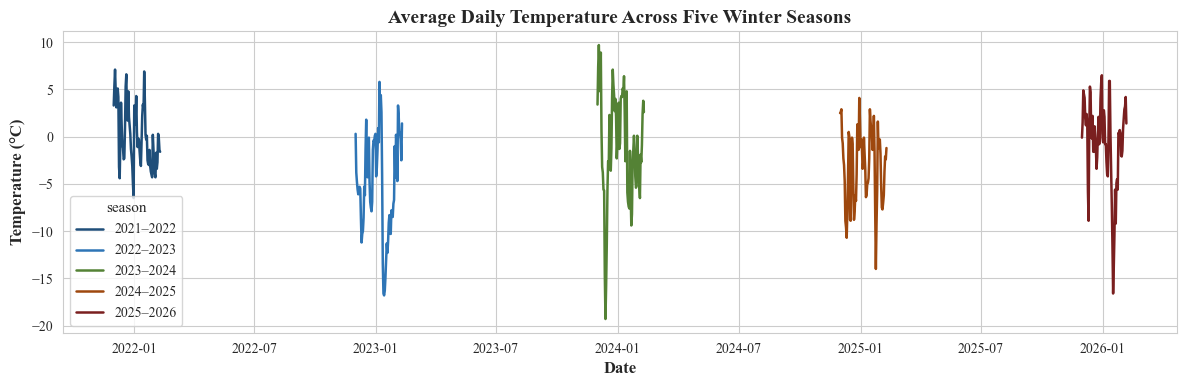

In [38]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    data=df,
    x="date",
    y="tavg",
    hue="season",
    linewidth=1.8
)
plt.title("Average Daily Temperature Across Five Winter Seasons")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

### Distribution of Average Temperature by Season

Distributional analysis allows for direct comparison of central tendency,
spread, and extremal behavior across winters.

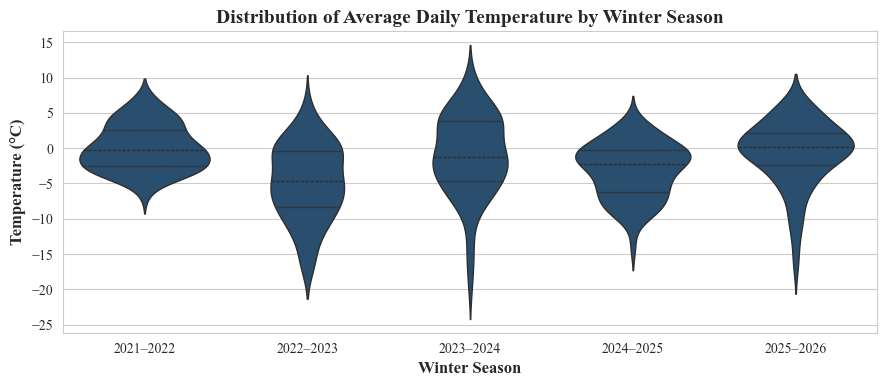

In [39]:
plt.figure(figsize=(9, 4))
sns.violinplot(
    data=df,
    x="season",
    y="tavg",
    inner="quartile",
    linewidth=1
)
plt.title("Distribution of Average Daily Temperature by Winter Season")
plt.xlabel("Winter Season")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

### Ranking of Winters by Mean Temperature

Average seasonal temperature provides a simple but informative
indicator of relative winter severity.

In [40]:
mean_ranking = df.groupby("season")["tavg"].mean().sort_values()
mean_ranking

season
2022–2023   -4.860563
2024–2025   -3.100000
2023–2024   -1.016901
2025–2026   -0.735294
2021–2022    0.102817
Name: tavg, dtype: float64

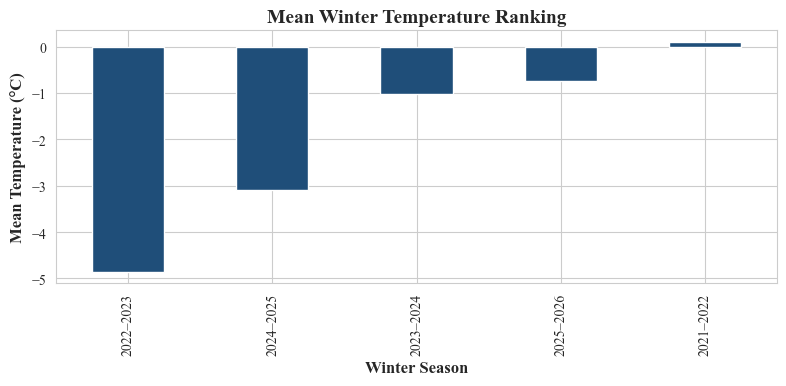

In [41]:
plt.figure(figsize=(8, 4))
mean_ranking.plot(kind="bar")
plt.title("Mean Winter Temperature Ranking")
plt.xlabel("Winter Season")
plt.ylabel("Mean Temperature (°C)")
plt.tight_layout()
plt.show()

### Frequency of Cold Extremes

The proportion of days with average temperature below −10°C
is used as an indicator of extreme winter conditions.

In [42]:
cold_extremes = (df["tavg"] < -10).groupby(df["season"]).mean()
cold_extremes

season
2021–2022    0.000000
2022–2023    0.183099
2023–2024    0.056338
2024–2025    0.028169
2025–2026    0.056338
Name: tavg, dtype: float64

### Intra-Day Temperature Variability

Daily temperature range (tmax − tmin) reflects atmospheric instability
and continental climatic characteristics.

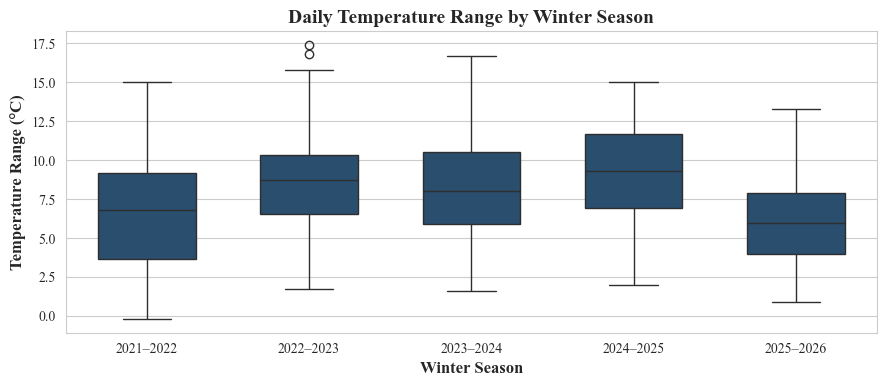

In [43]:
df["temp_range"] = df["tmax"] - df["tmin"]

plt.figure(figsize=(9, 4))
sns.boxplot(
    data=df,
    x="season",
    y="temp_range",
    width=0.6
)
plt.title("Daily Temperature Range by Winter Season")
plt.xlabel("Winter Season")
plt.ylabel("Temperature Range (°C)")
plt.tight_layout()
plt.show()

### Correlation Structure

Pearson correlation coefficients are computed to evaluate linear
relationships between temperature and other meteorological variables.

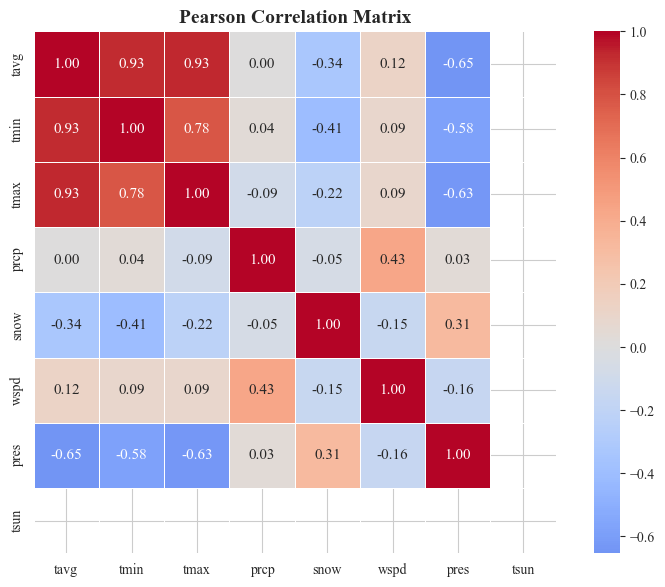

In [44]:
corr_cols = ["tavg", "tmin", "tmax", "prcp", "snow", "wspd", "pres", "tsun"]
corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()

### Key Analytical Findings

- Significant inter-seasonal variability is observed across five winters.
- Certain winters exhibit substantially higher frequency of cold extremes.
- Mean seasonal temperature differs meaningfully between years.
- Intra-day variability remains structurally stable across seasons.
- Strong linear relationships exist between average, minimum, and maximum temperature.
- Sunshine duration shows a positive association with temperature.

These findings justify the inclusion of lagged features, rolling statistics,
and exogenous meteorological variables in subsequent modeling stages.

In [45]:
df.to_csv("../data/processed/winter_2021_2026.csv", index=False)